In [203]:
from tqdm import tqdm_notebook

import json
import numpy as np
from skimage.transform import rotate
from keras.datasets.mnist import load_data
from scipy.ndimage import gaussian_filter, rotate
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train - x_train.mean()
x_train = x_train / x_train.std()
x_test = x_test - x_test.mean()
x_test = x_test / x_test.std()

## Tangent vector by center finite difference

In [174]:
digit = x_train[0]
digit = digit / digit.max()
digit.min(), digit.max()
digit = gaussian_filter(digit, 1/2)

In [223]:
angle = np.finfo(float).eps * 1000#
angle = 1e-3
left_rotated_digit = rotate(digit, angle, reshape=False)
right_rotated_digit = rotate(digit, - angle, reshape=False)
tangent_vector = (left_rotated_digit - right_rotated_digit) / (2 * angle)

-0.13382757585889138 0.1272747509937222


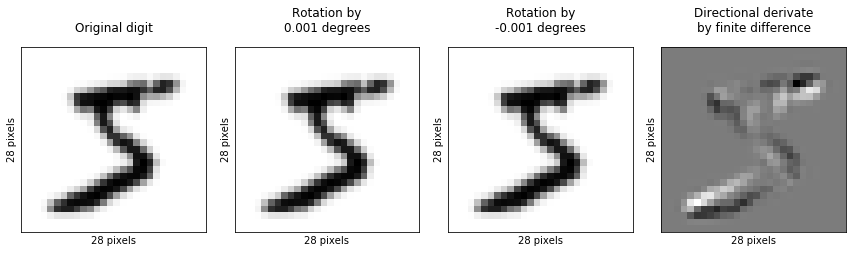

In [224]:
fig = plt.figure(figsize=(12, 4))

fig.add_subplot(141)
plt.title('Original digit', y=1.05)
plt.imshow(digit, cmap='gray_r')
plt.xticks([]); plt.yticks([])
plt.xlabel('28 pixels'); plt.ylabel('28 pixels')

fig.add_subplot(142)
plt.title(f'Rotation by\n{angle} degrees', y=1.05)
plt.imshow(left_rotated_digit, cmap='gray_r')
plt.xticks([]); plt.yticks([])
plt.xlabel('28 pixels'); plt.ylabel('28 pixels')

fig.add_subplot(143)
plt.title(f'Rotation by\n{-angle} degrees', y=1.05)
plt.imshow(right_rotated_digit, cmap='gray_r')
plt.xticks([]); plt.yticks([])
plt.xlabel('28 pixels'); plt.ylabel('28 pixels')

fig.add_subplot(144)
plt.title('Directional derivate\nby finite difference', y=1.05)
plt.imshow(tangent_vector, cmap='gray_r')
print(tangent_vector.min(), tangent_vector.max())
plt.xticks([]); plt.yticks([])
plt.xlabel('28 pixels'); plt.ylabel('28 pixels')

plt.tight_layout()
plt.show()

In [90]:
np.allclose(digit, rotated_digit), np.allclose(rotated_digit, rotate(digit, 1, reshape=False))

(False, False)

## Create rotation dataset

In [207]:
x_train_modified = []
np.random.seed(42)
degrees_to_rotate = np.random.choice([0, 60, 120, 180, 240, 300, 360], size=len(x_train))
for x, deg in tqdm_notebook(list(zip(x_train, degrees_to_rotate))):
    x = gaussian_filter(x, 1/2)
    x_train_modified.append(rotate(x, deg, reshape=False))
x_train_modified = np.array(x_train_modified)

In [209]:
x_test_modified = []
np.random.seed(42)
degrees_to_rotate = np.random.choice(np.arange(360), size=len(x_test))
for x, deg in tqdm_notebook(list(zip(x_test, degrees_to_rotate))):
    x = gaussian_filter(x, 1/2)
    x_test_modified.append(rotate(x, deg, reshape=False))
x_test_modified = np.array(x_test_modified)